# Law of Large Numbers and Central Limit Theorem

This lecture illustrates two of the most important theorems of probability and statistics: The Law of Large Numbers (LLN) and the Central Limit Theorem (CLT). We will also show examples and applications with these two fundamental theorems.

Agenda is as follows:
1. LLN, proof, examples
1. CLT, examples
1. Applications of these theorems
    * Hypothesis Testing
    * Linear State Space Models
1. Macroeconomics in heavy tails: where CLT and LLN don't work


In [1]:
# Import libraries for future purpose
import numpy as np
import scipy.stats as stats # Distribution classes of random variable
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9) # Set the default size of graphs

## Law of Large Numbers

The theorems of LLN in general characterizes the evolution of mean value of random samples, with different restrictions.
Let $X_{i}$ be identical and independent distributed variables following distribution $F$.

Denote $\bar{X}_{n}=\frac{1}{n}\sum_{i=1}^{n} X_{i}$.

Denote mean $\mu=\mathbb{E}X$, variance $\sigma^{2}=\mathbb{E}(X-\mathbb{E}X)^{2}$

Then

**Weak LLN** _(Khinchin)_: If $ X_1, \ldots, X_n $ is IID with $ \mathbb E X_i^2 < \infty $,
then, for any $ \epsilon > 0 $
$$
\lim_{n\to \infty} \Pr \left(|\bar{X}_{n}-\mu|<\epsilon\right) \rightarrow 1
$$

**Strong LLN**: Same assumptions, stronger result
$$
\Pr\left(\lim_{n\to\infty}\bar{X}_{n}=\mu\right)=1
$$

The difference between Weak LLN and Strong LLN: $|\bar{X}_{n}-\mu|>\epsilon$ may happen **infinite** times in WLLN, while **finite** in SLLN.

Proof of Strong LLN is not trivial. However proof of Weak LLN is simple through Chebyshev's inequality. 

**Lemma** _(Chebyshev's Inequality)_ 
$$
\Pr\left(\left|X-\mu\right|>\epsilon\right)\leqslant\frac{\sigma^{2}}{\epsilon^{2}}
$$

**Proof** _(Chebyshev's Inequality)_
$$
\begin{align*}
\sigma^{2} & =\int\left(X-\mu\right)^{2}dF\left(x\right)\\
 & \geqslant\int_{-\infty}^{\mu-\epsilon}\left(X-\mu\right)^{2}dF\left(x\right)+\int_{\mu+\epsilon}^{+\infty}\left(X-\mu\right)^{2}dF\left(x\right)\\
 & \geqslant\int_{-\infty}^{\mu-\epsilon}\epsilon^{2}dF\left(x\right)+\int_{\mu+\epsilon}^{+\infty}\epsilon^{2}dF\left(x\right)\\
 & =\epsilon^{2}\left[\int_{-\infty}^{\mu-\epsilon}dF\left(x\right)+\int_{\mu+\epsilon}^{+\infty}dF\left(x\right)\right]\\
 & =\epsilon^{2}\Pr\left(\left|X-\mu\right|>\epsilon\right)
\end{align*}
$$

**Proof** _(Weak Law of Large Numbers)_ First, we show the variance of random variable $\bar{X}_{n}$
$$
\begin{align*}
    \mathbb E [ (\bar X_n - \mu)^2 ]
    & = \mathbb E \left\{ \left[
    \frac{1}{n} \sum_{i=1}^n (X_i - \mu)
    \right]^2 \right\}
    \\
    & = \frac{1}{n^2} \sum_{i=1}^n \sum_{j=1}^n \mathbb E (X_i - \mu)(X_j - \mu) \nonumber
    \\
    & = \frac{1}{n^2} \sum_{i=1}^n \mathbb E (X_i - \mu)^2 \nonumber
    \\
    & = \frac{\sigma^2}{n} \nonumber
\end{align*}
$$

Because of independence the cross-terms are 0. Then we apply Chebyshev's Inequality directly,
$$
\Pr \left\{ | \bar X_n - \mu | \geq \epsilon \right\}
\leq \frac{\sigma^2}{n \epsilon^2}
$$
And the original proposition is proved.

**Example 1** Simulate one sample path with Normal distribution.

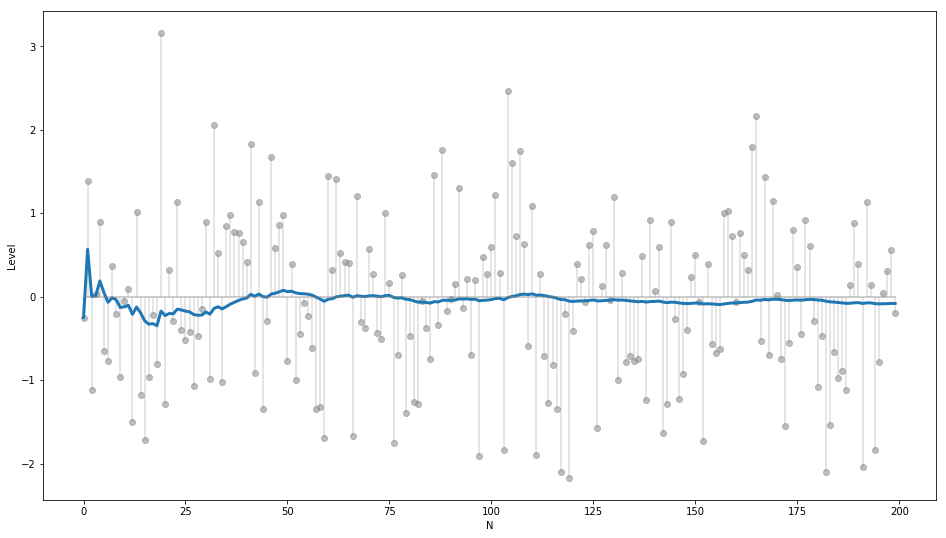

In [7]:
sample_length = 200
sample = np.random.randn(sample_length)
sample_mean = np.zeros(sample_length)
for i in range(sample_length):
    sample_mean[i] = np.mean(sample[0:i + 1])
    
# Plot
plt.figure(figsize = (16, 9))
plt.plot(list(range(sample_length)), sample, 'o', color = 'grey', alpha = 0.5)
plt.vlines(list(range(sample_length)), 0, sample, linewidth = 0.2)
plt.plot(list(range(sample_length)), sample_mean, linewidth = 3.0)
plt.plot(list(range(sample_length)), np.zeros(sample_length), \
         color = 'grey', alpha = 0.5)
plt.xlabel('N')
plt.ylabel('Level')
plt.show()

**Example 2** Simulate multiple sample chains.

Think in a vectorized way when coding: this is very useful in dynamic languages. In interpreted languages like Python, loops are not compiled while existing functions in low level are. Therefore avoiding loops and use vectorized code can be more efficient.

In [22]:
sample_length = 1000
tmp = np.random.randn(sample_length)
sample_mean = np.zeros(sample_length)

In [23]:
%timeit sample_mean = tmp.cumsum() / np.linspace(1, sample_length, sample_length)

26.9 µs ± 3.02 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [24]:
%%timeit
for i in range(sample_length):
    sample_mean[i] = np.mean(sample[0:i + 1])

6.56 ms ± 364 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Is the slow down because of duplicated calculations?

In [25]:
%%timeit
s = 0
for i in range(1000):
    s = s + tmp[i]
    sample_mean[i] = s / (i + 1)

711 µs ± 87 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


NO, it is not! Loop is much slower than vectorized operations even if we use the same algorithm.

In [14]:
# Define the sample length and the number of samples to simulate
sample_length = 1000
N_sample = 10

series_mean = np.zeros([sample_length, N_sample])
for i in range(N_sample):
    tmp = np.random.randn(sample_length) # Draw standard Normal values
    series_mean[:, i] = tmp.cumsum() / np.linspace(1, sample_length, sample_length)

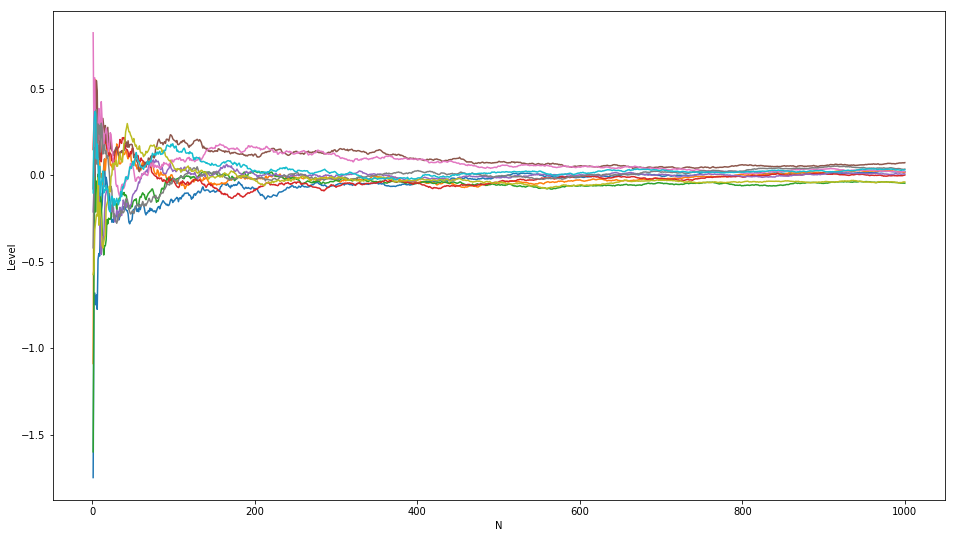

In [15]:
plt.figure(figsize = (16, 9))
plt.plot(np.linspace(1, sample_length, sample_length), series_mean)
plt.xlabel('N')
plt.ylabel('Level')
plt.show()

### Exercise in Class

For the example above we showed that IID draws from standard Normal distribution follows LLN. How about other distributions with finite mean and variance?

There are a lot of distribution types under `scipy.stats`. Recall one advantage of Object-Oriented Programming: these distributions are all inherited objects from a parent object. Therefore it is easier to switch between different types of distributions.

The task is the following:
1. Choose any distribution type you like (with finite mean and variance), including but not limited to
    * Exponential
    * Log-Normal
    * Beta
    * Gamma
    * ...
1. Replicate the exercise we did above

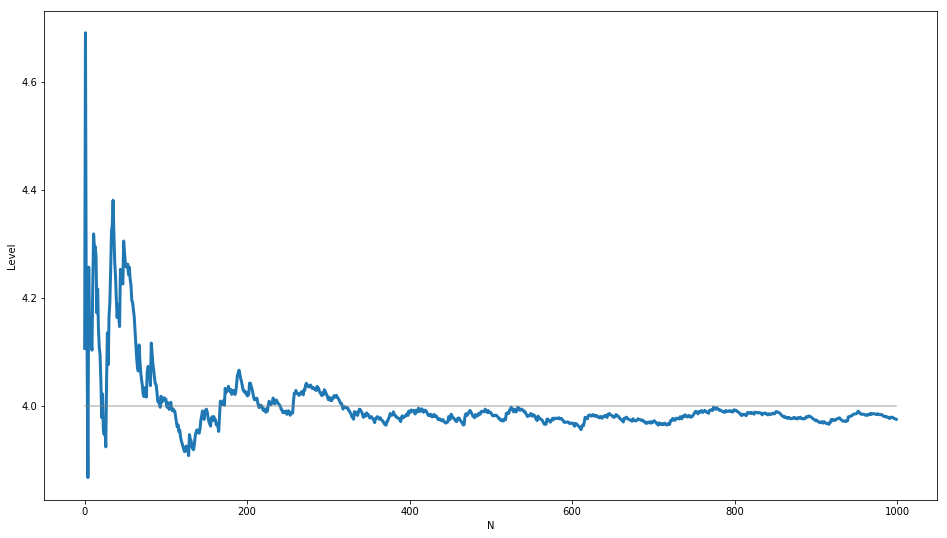

In [33]:
# TODO: in class
sample_length = 1000
dist = stats.gamma(2, 2)
mu = dist.mean()

sample = dist.rvs(sample_length)
sample_mean = sample.cumsum() / np.linspace(1, sample_length, sample_length)
# Plot
plt.figure(figsize = (16, 9))
plt.plot(list(range(sample_length)), sample_mean, linewidth = 3.0)
plt.plot(list(range(sample_length)), mu * np.ones(sample_length), \
         color = 'grey', alpha = 0.5)
plt.xlabel('N')
plt.ylabel('Level')
plt.show()

**Example 3** _(Infinite Mean)_: What happens if the condition $\mathbb E|X|<\infty$ in the statement of the LLN is not satisfied?

This might be the case if the underlying distribution is heavy tailed — the best known example is the Cauchy distribution, which has density

$$
f(x) = \frac{1}{\pi (1 + x^2)} \qquad (x \in \mathbb R)
$$


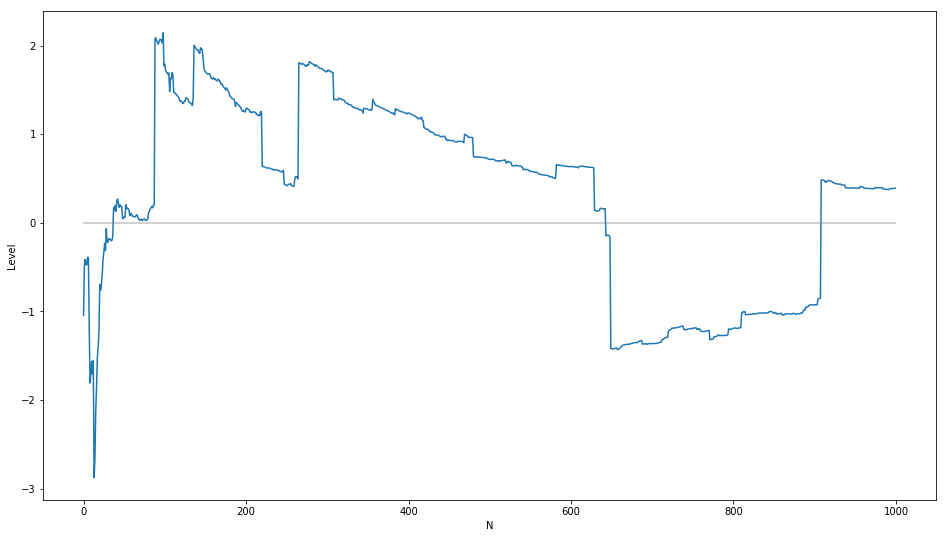

In [34]:
sample_length = 1000
dist = stats.cauchy()
mu = dist.mean()
sample = dist.rvs(sample_length)
sample_mean = np.zeros(sample_length)
for i in range(sample_length):
    sample_mean[i] = np.mean(sample[0:i + 1])
    
# Plot
plt.figure(figsize = (16, 9))
# plt.plot(list(range(sample_length)), sample, 'o', color = 'grey', alpha = 0.5)
# plt.vlines(list(range(sample_length)), 0, sample, linewidth = 0.2)
plt.plot(list(range(sample_length)), sample_mean)
plt.plot(list(range(sample_length)), np.zeros(sample_length), color = 'grey', alpha = 0.5)
plt.xlabel('N')
plt.ylabel('Level')
plt.show()

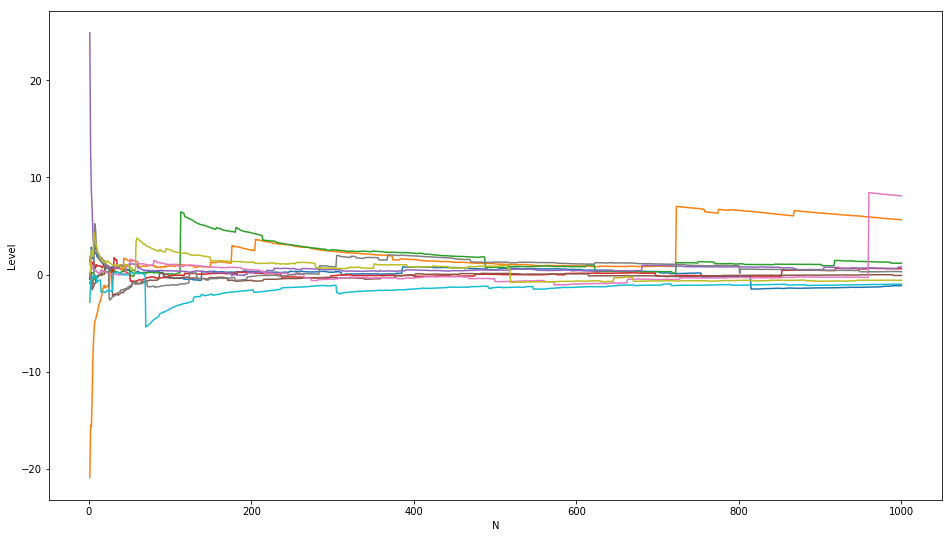

In [74]:
dist = stats.cauchy()
mu = dist.mean()
# Define the sample length and the number of samples to simulate
sample_length = 1000
N_sample = 10

series_mean = np.zeros([sample_length, N_sample])
for i in range(N_sample):
    tmp = dist.rvs(sample_length) # Draw standard Normal values
    series_mean[:, i] = tmp.cumsum() / np.linspace(1, sample_length, sample_length)

plt.figure(figsize = (16, 9))
plt.plot(np.linspace(1, sample_length, sample_length), series_mean)
plt.plot(np.linspace(1, sample_length, sample_length), mu * np.ones(sample_length), 'k--', alpha = 0.5)
plt.xlabel('N')
plt.ylabel('Level')
plt.show()

Formal proof of this result is to use the Charateristic Function.

**Example 4** _(Infinite Variance)_ What happens if the underlying distribution has undefined variance?
Take Pareto distribution with $\alpha < 2$ as an example.

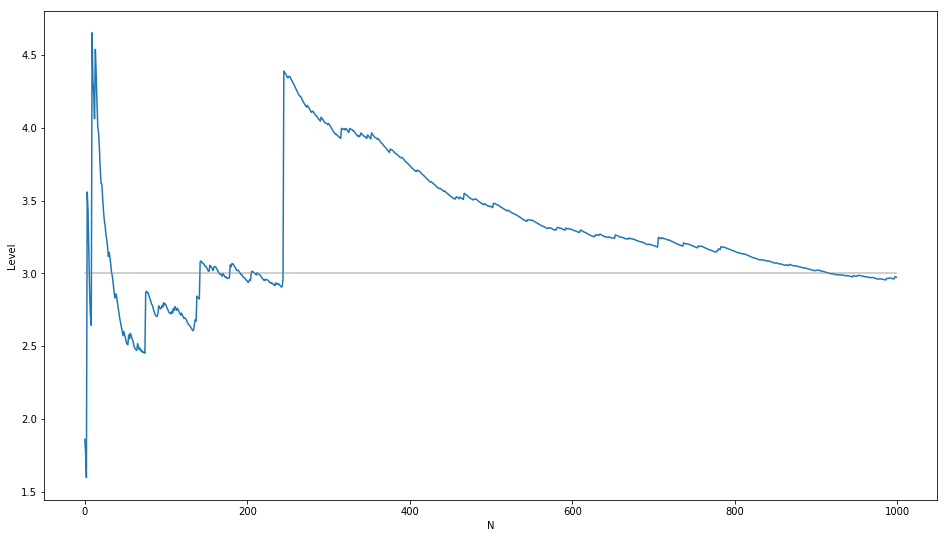

In [38]:
sample_length = 1000
dist = stats.pareto(b = 1.5)
mu = dist.mean()
sample = dist.rvs(sample_length)
sample_mean = np.zeros(sample_length)
for i in range(sample_length):
    sample_mean[i] = np.mean(sample[0:i + 1])
    
# Plot
plt.figure(figsize = (16, 9))
# plt.plot(list(range(sample_length)), sample, 'o', color = 'grey', alpha = 0.5)
# plt.vlines(list(range(sample_length)), 0, sample, linewidth = 0.2)
plt.plot(list(range(sample_length)), sample_mean)
plt.plot(list(range(sample_length)), np.ones(sample_length) * mu, color = 'grey', alpha = 0.5)
plt.xlabel('N')
plt.ylabel('Level')
plt.show()

## Law of Large Numbers, Correlated

We introduced LLN with **IID** assumption. Now we take out **independence**. The key for LLN to hold is to have covariances summable as the proof above suggests.

Denote covariance $\sigma_{st}=\mathbb{E}\left(\left(X_{s}-\mu\right)\left(X_{t}-\mu\right)\right)$. Let's revisit the proof we have above for Weak Law of Large Numbers. We calculate the variance of $\bar{X}_n - \mu$,
$$
\begin{align*}
    \mathbb E [ (\bar X_n - \mu)^2 ]
    & = \mathbb E \left\{ \left[
    \frac{1}{n} \sum_{i=1}^n (X_i - \mu)
    \right]^2 \right\}
    \\
    & = \frac{1}{n^2} \sum_{i=1}^n \sum_{j=1}^n \mathbb E (X_i - \mu)(X_j - \mu) \nonumber
\end{align*}
$$
When the process is IID, we know the variance shrinks with $n$. And we just need a similar condition here for correlated case.


**WLLN, correlated**: If $X_n$ is stationary $L^2$ and has summable variance,
$$
\forall s,\sum_{t=-\infty}^{\infty}\left|\sigma_{st}\right|\leqslant c<\infty
$$
then WLLN still holds.

SLLN has a similar argument with a bit more work.


**Example 1** AR(1) process satisfies this propercy and is widely used in macroeconomics,
$$
X_{t+1} = \rho \cdot X_{t} + \sigma \cdot \epsilon_{t+1}
$$
where $\epsilon$ follows standard Normal distribution, $\rho < 1$. With a little algebra we can show that
$$
\sum_{t=-\infty}^{\infty}\left|\sigma_{st}\right|=\frac{\sigma^{2}}{\left(1-\left|\rho\right|\right)^{2}}<\infty
$$


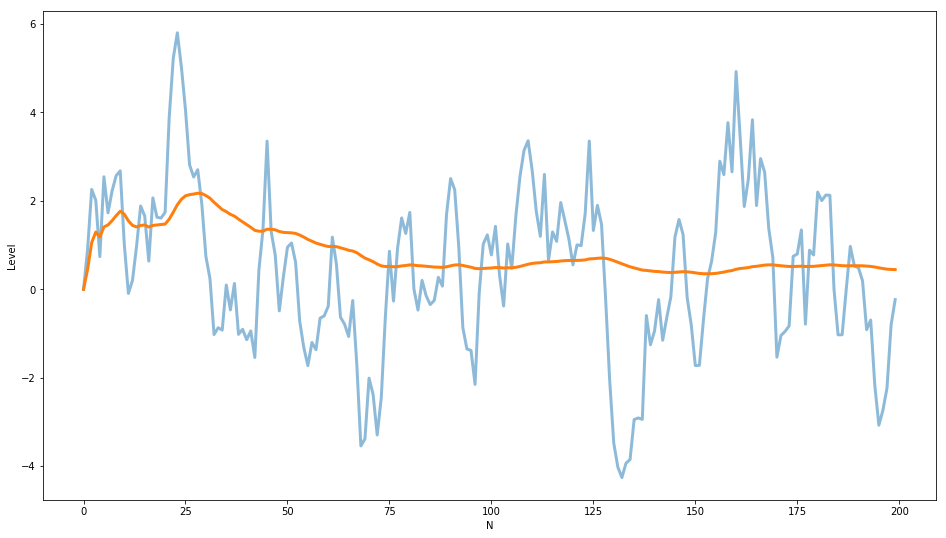

In [40]:
sample_length = 200
rho = 0.8 # Set the persistence of the data generating process
sigma = 1.0 # Set the standard deviation of the shocks
shocks = np.random.randn(sample_length)
sample = np.zeros(sample_length)
for i in range(sample_length - 1):
    sample[i + 1] = rho * sample[i] + shocks[i]
sample_mean = np.zeros(sample_length)
for i in range(sample_length):
    sample_mean[i] = np.mean(sample[0:i + 1])
    
# Plot
plt.figure(figsize = (16, 9))
plt.plot(list(range(sample_length)), sample, alpha = 0.5, linewidth = 3.0)
plt.plot(list(range(sample_length)), sample_mean, linewidth = 3.0)
plt.xlabel('N')
plt.ylabel('Level')
plt.show()

In [45]:
# Define the sample length and the number of samples to simulate
sample_length = 1000
N_sample = 5
rho = 0.4 # Set the persistence of the data generating process
sigma = 1.0 # Set the standard deviation of the shocks

series_mean = np.zeros([sample_length, N_sample])
for i in range(N_sample):
    tmp = np.random.randn(sample_length) * sigma # Draw standard Normal values
    y = np.zeros(sample_length)
    for j in range(sample_length - 1):
        y[j + 1] = rho * y[j] + tmp[j]
    series_mean[:, i] = y.cumsum() / np.linspace(1, sample_length, sample_length)

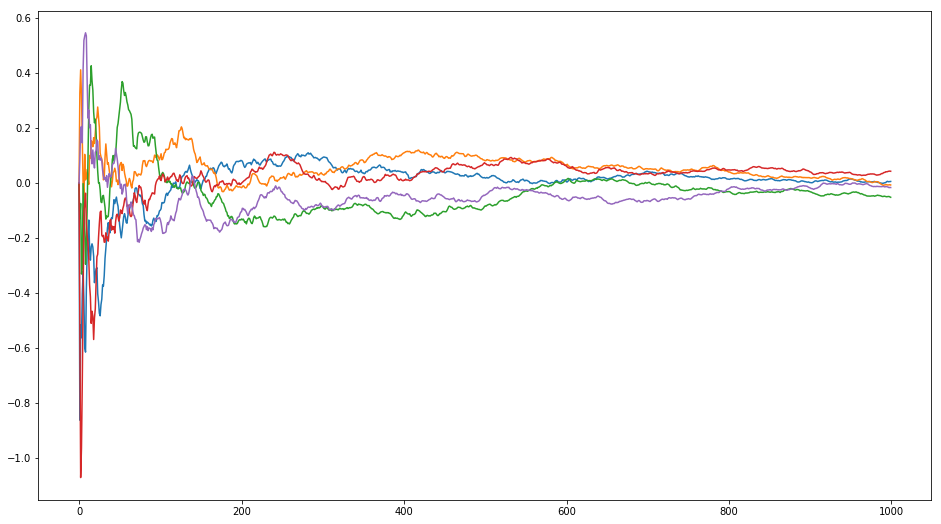

In [46]:
fig = plt.plot(list(range(sample_length)), series_mean)

### Exercise in Class

We know that AR(1) process follows Weak LLN. How does each of the parameters affect the speed of convergence?
Tasks:
1. Change persistence $\rho \in \left(-1, 1\right)$
1. Compare simulations with different values of $\rho$ in the same graph
1. Make another graph and change variance $\sigma$ this time

The larger $|\rho|$ is, the slower/faster it converges? The larger $\sigma$ is, the slower/faster it converges?

In [65]:
sample_length = 1000
N_sample = 3

rho = 0.8
# rho = [0.5, 0.8, 0.95]
# sigma = 1.0
sigma = np.array([0.5, 1.0, 1.5])

shocks = np.random.randn(sample_length)
sample = np.zeros([N_sample, sample_length])
for i in range(sample_length - 1):
    sample[:, i + 1] = rho * sample[:, i] + sigma.T * shocks[i + 1]

series_mean = sample.cumsum(axis = 1) / np.linspace(1, sample_length, sample_length)



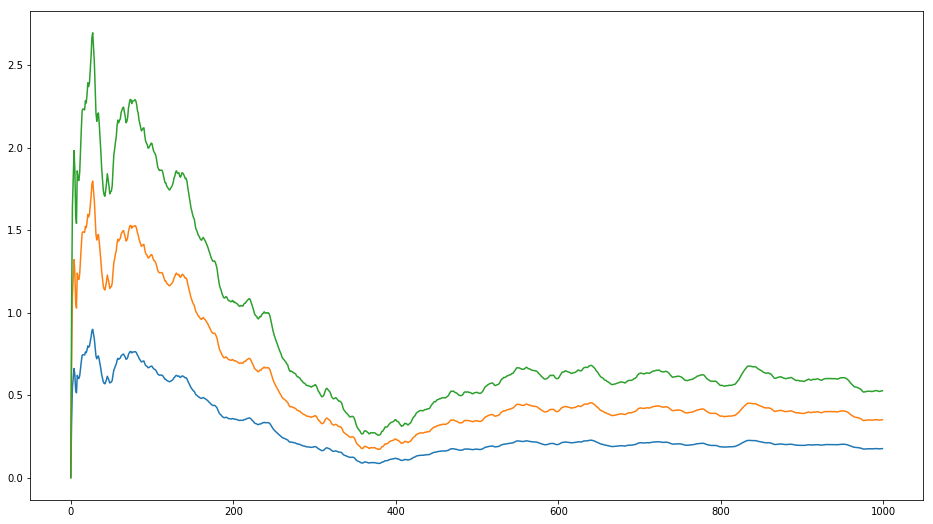

In [66]:
fig = plt.plot(list(range(sample_length)), series_mean.T)

## Central Limit Theorem

Central Limit Theorem further characterizes the asymptotic properties of the mean of random variables. The statement of the theorem is as follows,

**Central Limit Theorem** _(Levy-lindeberg)_ If the sequence $ X_1, \ldots, X_n $ is IID, with common mean $ \mu $ and common finite variance $ \sigma^2 $, then
$$
\sqrt{n} ( \bar X_n - \mu ) \stackrel { d } {\to} N(0, \sigma^2)
\quad \text{as} \quad
n \to \infty
$$

Convergence in distribution is also as known as **Weakly Convergence**.

For anyone who is interested, the formal proof of this theorem is through a second order Taylor expansion of Characteristic function.

The striking implication of the CLT is that for **any** distribution with finite second moment, the mean of adding independent copies **always** leads to a Gaussian curve.

NOTICE: Both LLN and CLT captures the evolution of the **mean**.

**Example 1** _(de Moivre–Laplace)_: Normal distribution is the limit of binominal distribution in infinite draws.

Let $X_i$ be binary, with $\mathbb P\{X_i = 0\} = \mathbb P\{X_i = 1 \} = 0.5$, and let $ X_1, \ldots, X_n $ be independent. This is a special case of Bernoulli random variables. Think about $X_i = 1$ as "success" and $X_i = 0$ as "failure". 

First, we study $Y_n=\sum_{i=1}^{n}X_i$. $Y_n$ is the number of successful draws in $n$ times.

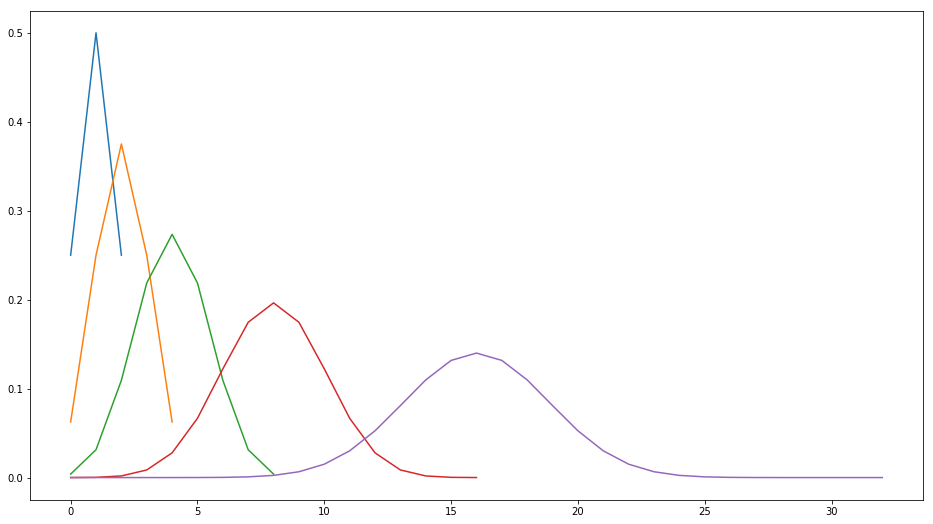

In [67]:
# Frequency, in absolute terms

n = [2, 4, 8, 16, 32]
for cur_n in n:
    dist = stats.binom(cur_n, 0.5)
    plt.plot(np.linspace(0, cur_n, cur_n + 1), dist.pmf(np.linspace(0, cur_n, cur_n + 1)))

### Exercise in Class

You may think that convergence to Normal distribution is only true when $p=0.5$. Is that true?

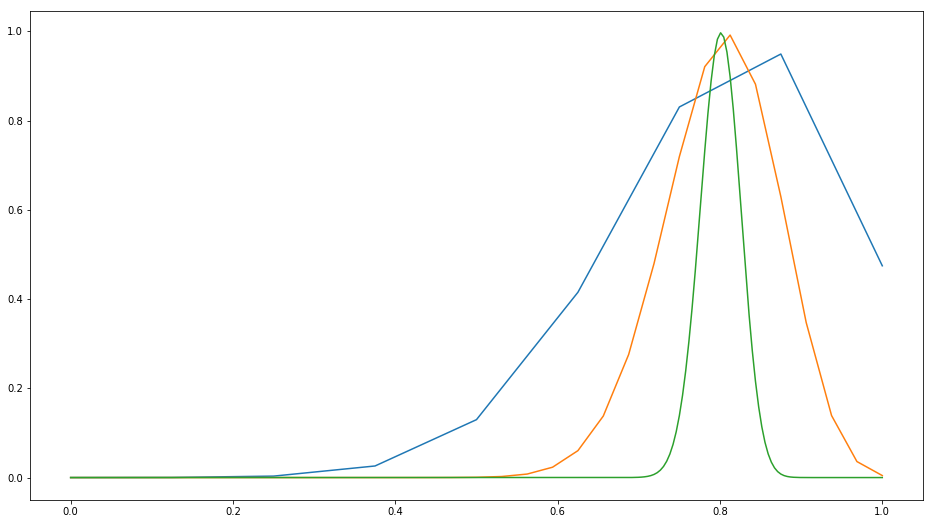

In [72]:
# TODO: in class
# Adjust with (0,1) and sqrt(n)

n = [8, 32, 256]
for cur_n in n:
    dist = stats.binom(cur_n, 0.8)
    plt.plot(np.linspace(0, 1, cur_n + 1), dist.pmf(np.linspace(0, cur_n, cur_n + 1)) * np.sqrt(cur_n))

**Example 2** We now perform the following simulation (to visually verify CLT)

1. Choose an arbitrary distribution $F$ for the underlying observations $X_i$  
1. Generate independent draws of $X_n$ and compute $Y_n = \sqrt{n} ( \bar X_n - \mu )$  
1. Check the histogram of the underlying distributio of $Y_n$ and compare with $N(0, \sigma^2)$  

Play around with different numbers, both the number of samples and sample size $n$. First, we play with the number of samples.

In [85]:
N_samples = 100
sample_length = 30000

# dist = stats.expon(loc = 0.0, scale = 2) # Choose a parametrized distribution
dist = stats.beta(a = 3, b = 3)

mu, sigma = dist.mean(), dist.std()

X = dist.rvs(size = (N_samples, sample_length))
sample_means = X.mean(axis = 1)
Y = np.sqrt(sample_length) * (sample_means - mu)

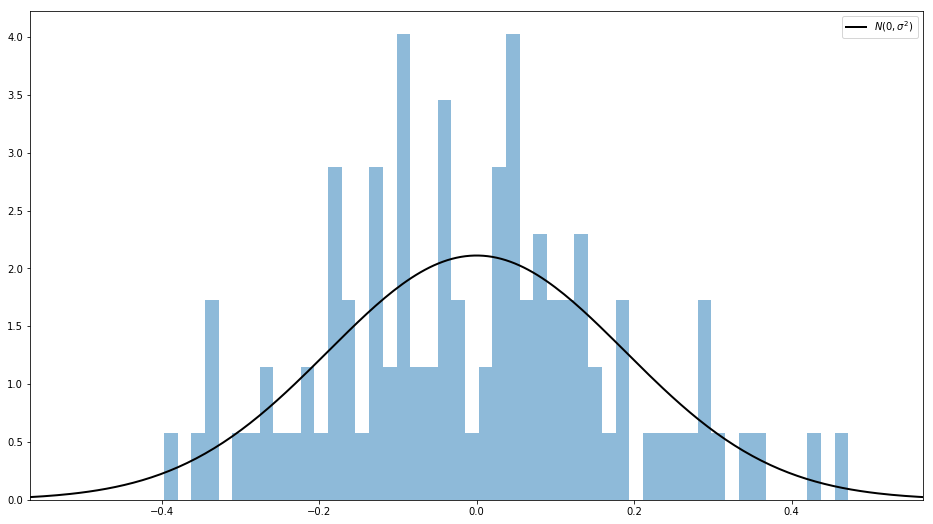

In [86]:
fig, ax = plt.subplots()
xmin, xmax = -3 * sigma, 3 * sigma
ax.set_xlim(xmin, xmax)
ax.hist(Y, bins = 50, alpha = 0.5, density = True)
xgrid = np.linspace(xmin, xmax, 200)
ax.plot(xgrid, stats.norm.pdf(xgrid, scale = sigma), 'k-', linewidth = 2, label = '$N(0, \sigma^2)$')
ax.legend()

plt.show()

**Example 2, continued** Then we compare results with different sample length $n$

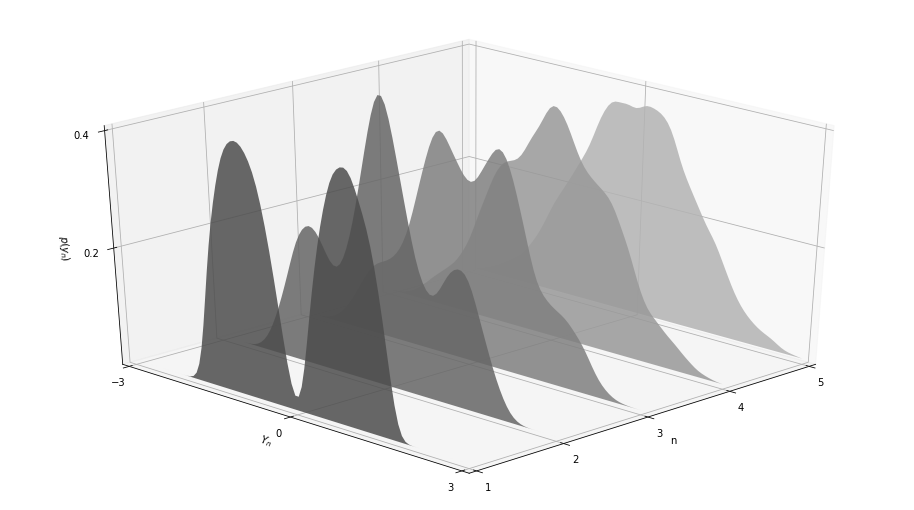

In [83]:
from scipy.stats import gaussian_kde
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection


beta_dist = stats.beta(2, 2)

def gen_x_draws(k):
    """
    Returns a flat array containing k independent draws from the
    distribution of X, the underlying random variable.  This distribution is
    itself a convex combination of three beta distributions.
    """
    bdraws = beta_dist.rvs((3, k))
    # == Transform rows, so each represents a different distribution == #
    bdraws[0, :] -= 0.5
    bdraws[1, :] += 0.6
    bdraws[2, :] -= 1.1
    # == Set X[i] = bdraws[j, i], where j is a random draw from {0, 1, 2} == #
    js = np.random.randint(0, 2, size=k)
    X = bdraws[js, np.arange(k)]
    # == Rescale, so that the random variable is zero mean == #
    m, sigma = X.mean(), X.std()
    return (X - m) / sigma

nmax = 5
reps = 100000
ns = list(range(1, nmax + 1))

# == Form a matrix Z such that each column is reps independent draws of X == #
Z = np.empty((reps, nmax))
for i in range(nmax):
    Z[:, i] = gen_x_draws(reps)
# == Take cumulative sum across columns
S = Z.cumsum(axis=1)
# == Multiply j-th column by sqrt j == #
Y = (1 / np.sqrt(ns)) * S

# == Plot == #

fig = plt.figure()
ax = fig.gca(projection='3d')

a, b = -3, 3
gs = 100
xs = np.linspace(a, b, gs)

# == Build verts == #
greys = np.linspace(0.3, 0.7, nmax)
verts = []
for n in ns:
    density = gaussian_kde(Y[:, n-1])
    ys = density(xs)
    verts.append(list(zip(xs, ys)))

poly = PolyCollection(verts, facecolors=[str(g) for g in greys])
poly.set_alpha(0.85)
ax.add_collection3d(poly, zs=ns, zdir='x')

ax.set(xlim3d=(1, nmax), xticks=(ns), ylabel='$Y_n$', zlabel='$p(y_n)$',
       xlabel=("n"), yticks=((-3, 0, 3)), ylim3d=(a, b),
       zlim3d=(0, 0.4), zticks=((0.2, 0.4)))
ax.invert_xaxis()
ax.view_init(30, 45)  # Rotates the plot 30 deg on z axis and 45 deg on x axis
plt.show()

**Example 3** _(Pascal's Triangle)_:

**Pascal's Triangle** is a triangular array of binomial coefficients. In China we call it **杨辉三角** or **贾宪三角**.

The rows of Pascal's triangle are conventionally enumerated starting with row $n = 0$ at the top (the 0th row). The entries in each row are numbered from the left beginning with $k = 0$ and are usually staggered relative to the numbers in the adjacent rows.

The triangle may be constructed in the following manner: In row 0 (the topmost row), there is a unique nonzero entry 1. Each entry of each subsequent row is constructed by adding the number above and to the left with the number above and to the right, treating blank entries as 0. For example, the initial number in the first (or any other) row is 1 (the sum of 0 and 1), whereas the numbers 1 and 3 in the third row are added to produce the number 4 in the fourth row.

![Pascal's Triangle](Pascal_triangle_small.png)

Let's create Pascal's Triangle and plot it out.

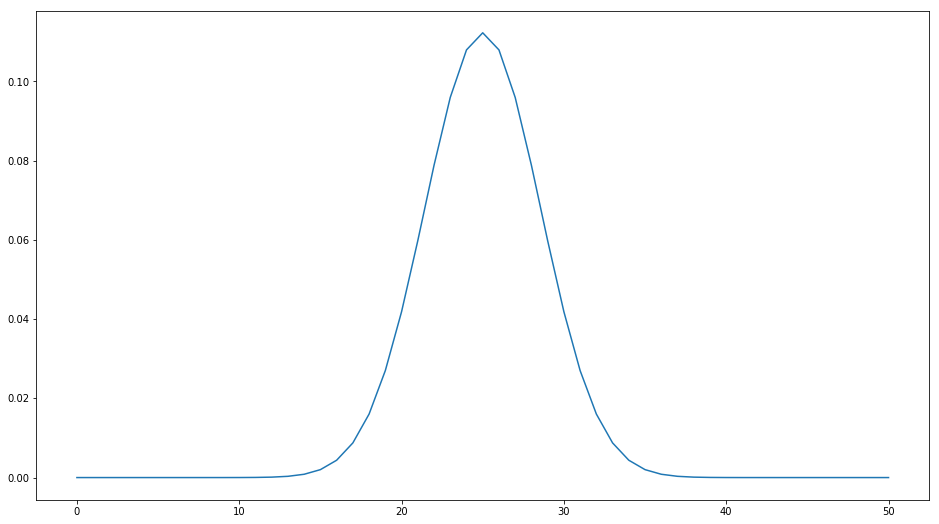

In [89]:
N = 50
tri = np.zeros((N + 1, N + 1))
tri[:, 0] = 1

for i in range(1, N + 1):
    for j in range(1, i + 1):
        tri[i, j] = tri[i - 1, j] + tri[i - 1, j - 1]

fig = plt.plot(list(range(N + 1)), tri[N, :] / np.sum(tri[N, :]))

While this result resonates with **de Moivre–Laplace** theorem, it also has a direct application: asset pricing with binomial tree. It provides a generalizable numerical method for the valuation of options, was first proposed by **Cox, Ross and Rubinstein**.

This approximation method says a Brownian motion can be approximated by a binomial tree.

![Binomial Tree](Binomial_tree.png)

At each time period, the price $Q$ can go up by $u$ with probability $q$ and go down by $d$ with probability $1-q$. The key here is **recombining**: it is equivalent to go up-down as to go down-up.

Now you see the equivalence between this binomial tree and Pascal's triangle.

We simulate a symmetric version when $u=d$ and $q=\frac{1}{2}$, and take log of prices. It should converge to the unconditional distribution of random walk.

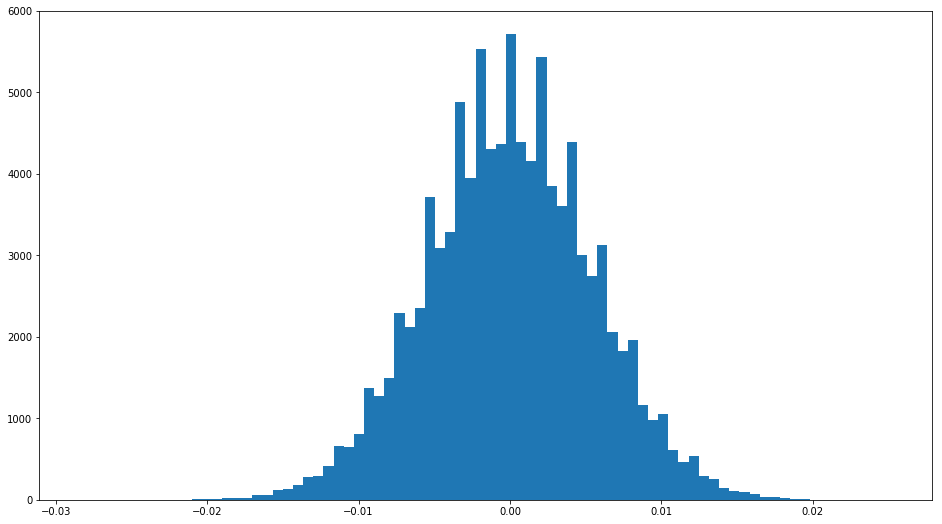

In [90]:
N_sample = 100000
T = 3000
u = 0.0001
q = 0.5

ensemble = np.zeros(N_sample)
for i in range(T):
    cur_step = stats.bernoulli.rvs(q, size = N_sample)
    ensemble = ensemble + u * (cur_step * 2 - 1)

plt.figure(figsize = (16, 9))
fig = plt.hist(ensemble, bins = 80)

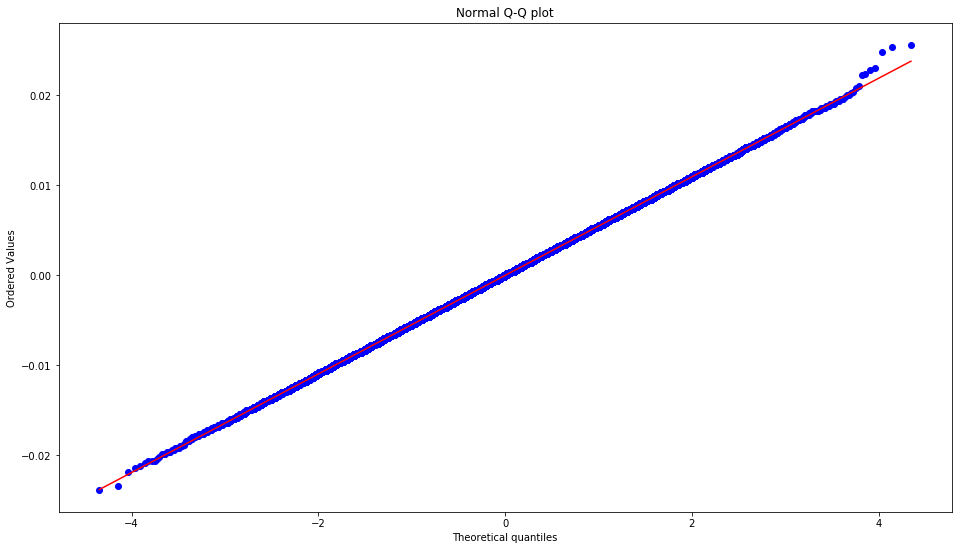

In [86]:
# Quantile-Quantile plot
plt.figure(figsize = (16, 9))
stats.probplot(ensemble, dist = "norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

## The Multivariate Case

A random vector $ \mathbf X $ is just a sequence of $ k $ random variables $ (X_1, \ldots, X_k) $

Each realization of $ \mathbf X $ is an element of $ \mathbb R^k $

A collection of random vectors $ \mathbf X_1, \ldots, \mathbf X_n $ is called independent if, given any $ n $ vectors $ \mathbf x_1, \ldots, \mathbf x_n $ in $ \mathbb R^k $, we have

$$
\mathbb P\{\mathbf X_1 \leq \mathbf x_1,\ldots, \mathbf X_n \leq \mathbf x_n \}
= \mathbb P\{\mathbf X_1 \leq \mathbf x_1 \}
\times \cdots \times \mathbb P\{ \mathbf X_n \leq \mathbf x_n \}
$$

(The vector inequality $ \mathbf X \leq \mathbf x $ means that $ X_j \leq x_j $ for $ j = 1,\ldots,k $)

Let $ \mu_j := \mathbb E [X_j] $ for all $ j =1,\ldots,k $

The expectation $ \mathbb E [\mathbf X] $ of $ \mathbf X $ is defined to be the vector of expectations:

$$
\mathbb E [\mathbf X] :=
\left(
\begin{array}{c}
    \mathbb E [X_1] \\
    \mathbb E [X_2] \\
    \vdots \\
    \mathbb E [X_k]
\end{array}
\right) =
\left(
\begin{array}{c}
    \mu_1 \\
    \mu_2\\
    \vdots \\
    \mu_k
\end{array}
\right) =: \boldsymbol \mu
$$

The *variance-covariance matrix* of random vector $ \mathbf X $ is defined as

$$
\mathop{\mathrm{Var}}[\mathbf X]
:= \mathbb E
[ (\mathbf X - \boldsymbol \mu) (\mathbf X - \boldsymbol \mu)']
$$

Expanding this out, we get

$$
\mathop{\mathrm{Var}}[\mathbf X] =
\left(
\begin{array}{ccc}
    \mathbb E [(X_1 - \mu_1)(X_1 - \mu_1)]
        & \cdots & \mathbb E [(X_1 - \mu_1)(X_k - \mu_k)] \\
    \mathbb E [(X_2 - \mu_2)(X_1 - \mu_1)]
        & \cdots & \mathbb E [(X_2 - \mu_2)(X_k - \mu_k)] \\
    \vdots & \vdots & \vdots \\
    \mathbb E [(X_k - \mu_k)(X_1 - \mu_1)]
        & \cdots & \mathbb E [(X_k - \mu_k)(X_k - \mu_k)] \\
\end{array}
\right)
$$

The $ j,k $-th term is the scalar covariance between $ X_j $ and
$ X_k $

With this notation we can proceed to the multivariate LLN and CLT

Let $ \mathbf X_1, \ldots, \mathbf X_n $ be a sequence of independent and
identically distributed random vectors, each one taking values in
$ \mathbb R^k $

Let $ \boldsymbol \mu $ be the vector $ \mathbb E [\mathbf X_i] $, and let $ \Sigma $
be the variance-covariance matrix of $ \mathbf X_i $

Interpreting vector addition and scalar multiplication in the usual way (i.e., pointwise), let

$$
\bar{\mathbf X}_n := \frac{1}{n} \sum_{i=1}^n \mathbf X_i
$$

In this setting, the LLN tells us that

$$
\mathbb P \left\{ \bar{\mathbf X}_n \to \boldsymbol \mu \text{ as } n \to \infty \right\} = 1
$$

Here $ \bar{\mathbf X}_n \to \boldsymbol \mu $ means that $ \| \bar{\mathbf X}_n - \boldsymbol \mu \| \to 0 $, where $ \| \cdot \| $ is the standard Euclidean norm

The CLT tells us that, provided $ \Sigma $ is finite,

$$
\sqrt{n} ( \bar{\mathbf X}_n - \boldsymbol \mu ) \stackrel { d } {\to} N(\mathbf 0, \Sigma)
$$

## Applications of Central Limit Theorem

### Hypothesis Testing

**Example 1** _($\chi^2$ distribution)_
From multivariate CLT we know
$$
\sqrt{n} ( \bar{\mathbf X}_n - \boldsymbol \mu ) \stackrel { d } {\to} N(\mathbf 0, \Sigma)
$$

Assume that if $ \mathbf Q $ is the inverse square root of $ \mathbf \Sigma $, then

$$
\mathbf Z_n := \sqrt{n} \mathbf Q ( \bar{\mathbf X}_n - \boldsymbol \mu )
\stackrel{d}{\to}
\mathbf Z \sim N(\mathbf 0, \mathbf I)
$$

Given the distribution of $ \mathbf Z $, we conclude that
$$
n \| \mathbf Q ( \bar{\mathbf X}_n - \boldsymbol \mu ) \|^2
\stackrel{d}{\to}
\chi^2(k)
$$

where $ \chi^2(k) $ is the chi-squared distribution with $ k $ degrees
of freedom. Recall that $ k $ is the dimension of $ \mathbf X_i $.

We can illustrate this result by simulation. In doing so, let

$$
\mathbf X_i :=
\left(
\begin{array}{c}
    W_i \\
    U_i + W_i
\end{array}
\right)
$$

where

- each $ W_i $ is an IID draw from the uniform distribution on $ [-1, 1] $  
- each $ U_i $ is an IID draw from the uniform distribution on $ [-2, 2] $  
- $ U_i $ and $ W_i $ are independent of each other  

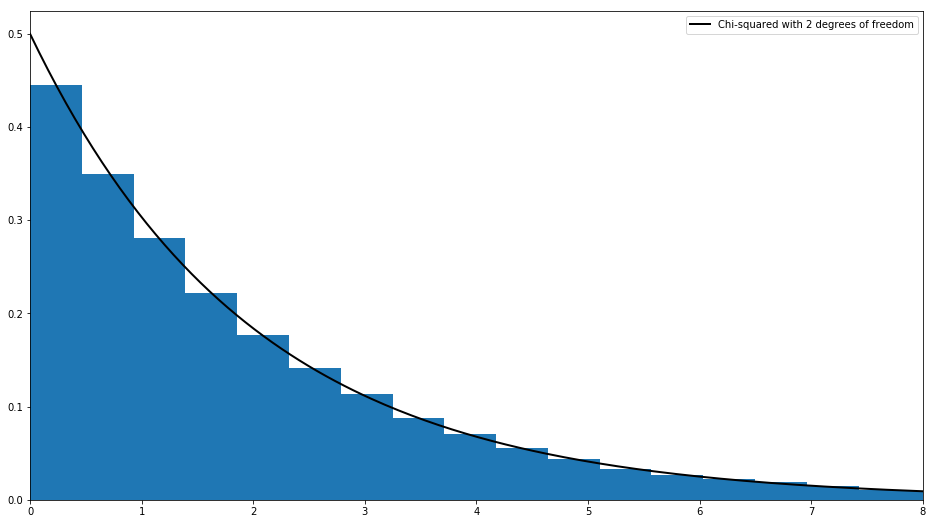

In [93]:
from scipy.linalg import inv, sqrtm

# == Set parameters == #
n = 2500
replications = 100000
dw = stats.uniform(loc=-1, scale=2)  # Uniform(-1, 1)
du = stats.uniform(loc=-2, scale=4)  # Uniform(-2, 2)
sw, su = dw.std(), du.std()
vw, vu = sw**2, su**2
Σ = ((vw, vw), (vw, vw + vu))
Σ = np.array(Σ)

# == Compute Σ^{-1/2} == #
Q = inv(sqrtm(Σ))

# == Generate observations of the normalized sample mean == #
error_obs = np.empty((2, replications))
for i in range(replications):
    # == Generate one sequence of bivariate shocks == #
    X = np.empty((2, n))
    W = dw.rvs(n)
    U = du.rvs(n)
    # == Construct the n observations of the random vector == #
    X[0, :] = W
    X[1, :] = W + U
    # == Construct the i-th observation of Y_n == #
    error_obs[:, i] = np.sqrt(n) * X.mean(axis=1)

# == Premultiply by Q and then take the squared norm == #
temp = Q @ error_obs
chisq_obs = np.sum(temp**2, axis=0)

# == Plot == #
fig, ax = plt.subplots(figsize=(16, 9))
xmax = 8
ax.set_xlim(0, xmax)
xgrid = np.linspace(0, xmax, 200)
lb = "Chi-squared with 2 degrees of freedom"
ax.plot(xgrid, stats.chi2.pdf(xgrid, 2), 'k-', lw=2, label=lb)
ax.legend()
ax.hist(chisq_obs, bins=50, density=True)
plt.show()

**Example 2**

In hypothesis testing, the benefit of sample size can almost always leads to significance.

In [120]:
sample = stats.norm.rvs(loc = 0.01, scale = 1, size = 100000)
t_stats, p_value = stats.ttest_1samp(sample, 0.0)
print(t_stats)
print(p_value)

3.096066824487378
0.0019616035497954766


###  Linear State Space Models

**Example 1**

Here we show the mean evolution of AR(1) process under an initial shock. To be specific,
$$
X_{t+1} = \rho \cdot X_{t} + \sigma \cdot \epsilon_{t+1}
$$
and we set $X_{1}$ as some non-zero number.

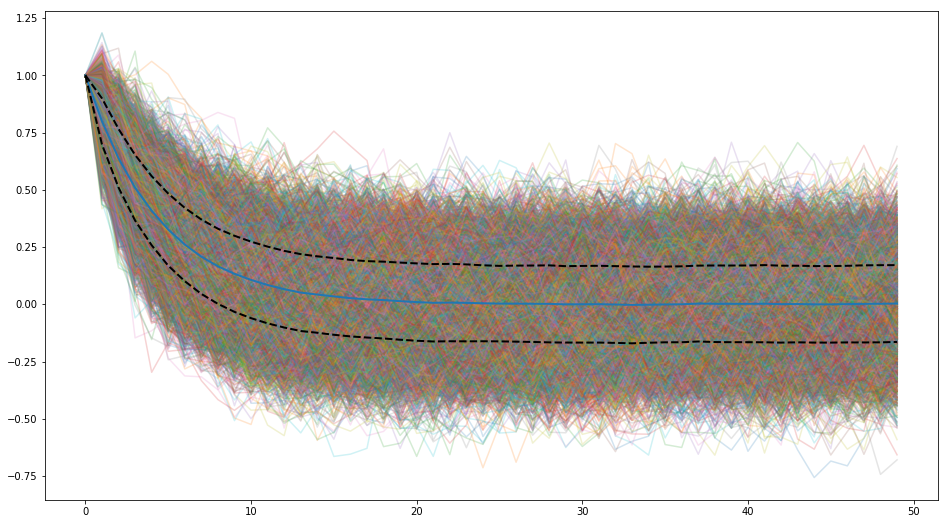

In [94]:
N_samples = 10000
sample_length = 50

rho = 0.8
sigma = 0.1

series = np.zeros((N_samples, sample_length))
series[:, 0] = 1.0
for i in range(sample_length - 1):
    series[:, i + 1] = rho * series[:, i] + sigma * stats.norm.rvs(size = N_samples)

plt.plot(list(range(sample_length)), series.T, alpha = 0.2)
plt.plot(list(range(sample_length)), series.mean(axis = 0), linewidth = 2.0)
plt.plot(list(range(sample_length)), series.mean(axis = 0) + series.std(axis = 0), 'k--', linewidth = 2.0)
plt.plot(list(range(sample_length)), series.mean(axis = 0) - series.std(axis = 0), 'k--', linewidth = 2.0)
plt.show()

Further, we can examine the evolution of cross-sectional distribution.

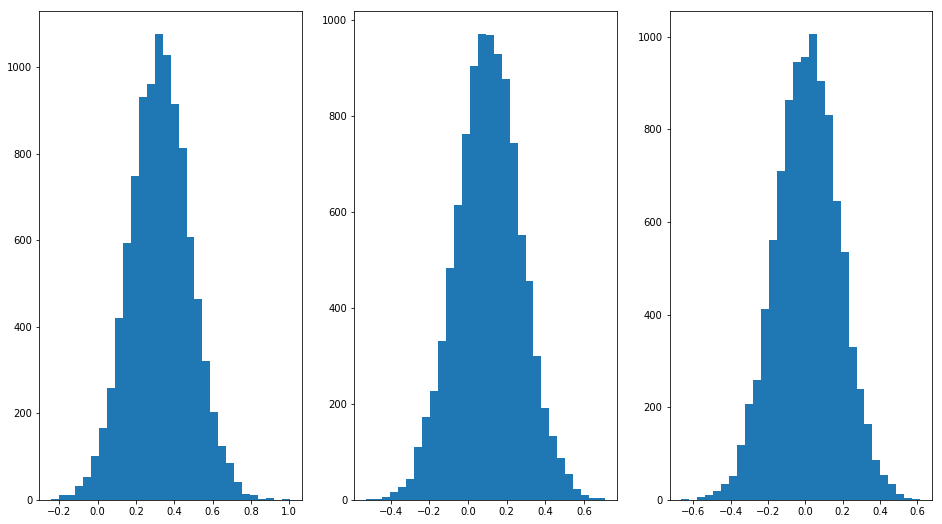

In [95]:
plt.subplot(1, 3, 1)
plt.hist(series[:, 5], bins = 30)
plt.subplot(1, 3, 2)
plt.hist(series[:, 10], bins = 30)
plt.subplot(1, 3, 3)
plt.hist(series[:, 20], bins = 30)
plt.show()

This is the reason that in macroeconomics we only need to show the **mean** and **variance** of the impulse response functions, as Central Limit Theorem will hold.

IN CLASS: Illustrate why linear models here

## Macro Economics in Heavy Tails

LLN and CLT suggests that a wide range of random variables has an asymptotic behavior similar to normal distribution.

But there are a lot of cases in macroeconomics that normality doesn't hold. Especially when there's heavy-tailed distributions.

We know that $\exp(x)$ will surpass $x^n$ when $x\to\infty$ at some point, regardless of $n$. Therefore $x^{-n}$ would be larger than $\exp(-x)$ when $x$ is sufficiently large. Pareto distribuion has a heavier tail than Normal distribution.

Empirically, a lot of data observations have long tails, or heavy tails. And (probably more) theory models generate disributions that violate normality.

**Example 1** _(Power Law)_: City size distribution follows
$$
\Pr\left(Size>S\right)=\frac{a}{S^{\zeta}}
$$
And a special case when $\zeta = 1$ is called **Zipf's law**.

![Log size vs log rank, US MSA 1991](zipf_msa.bmp)

The graph shows log of city sizes vs. log of size rank of cities in the United States, 1991. OLS estimates: $R^2=0.986, \zeta = 1.005, p\leqslant 0.001$

Theoretically, we only need one assumption to genrate this pattern observed in data. If different cities grow randomly with the same expected growth rate and the same variance (Gibrat's law), then the limit distribution of city sizes converges to Zipf's law.

Check the works from Xavier Gabaix for more details.

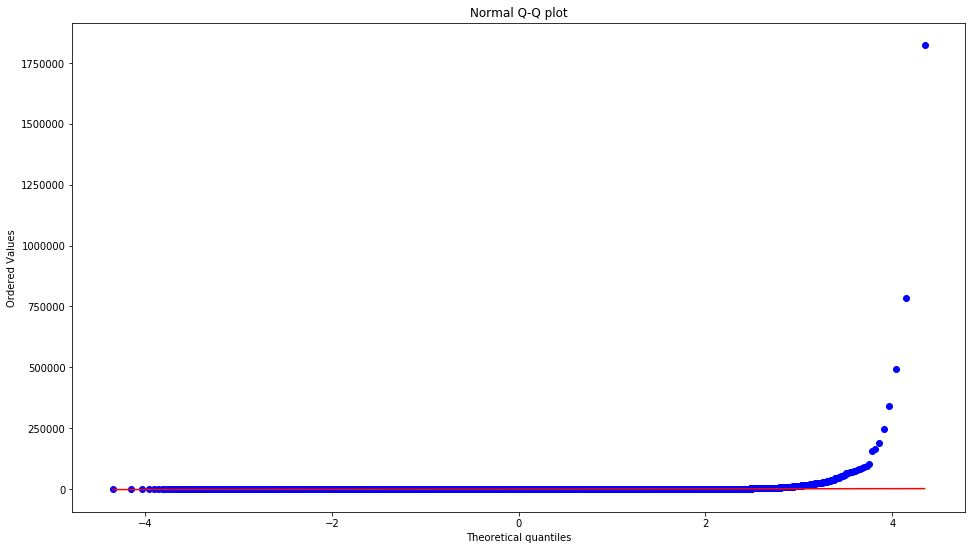

In [96]:
N_sample = 100000
T = 10

ensemble = np.ones(N_sample)
for i in range(T):
    cur_step = stats.lognorm.rvs(s = 1, loc = 0, size = N_sample)
    ensemble = ensemble * cur_step

# Quantile-Quantile plot
plt.figure(figsize = (16, 9))
stats.probplot(ensemble, dist = "norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

As we can see, Q-Q plot suggests a heavy tail than Normal distribution. **Gibrat's Law** happens not only in cities, but also in firm size, household income, gross output of the countries, and so on.

**Example 2** _(Growth of Income)_: These data show wage income of all working people in the United States.

The change of earnings in data is not normal. The result is robust within one year or within five years.

![histogram_income](income_hist.png)

It shows Pareto tail at both ends of the distribution.

![histogram_income_pareto](income_hist_pareto.png)

Lifecycle change of income also shows heavy tails on right end.

![histogram_income_lifecycle](income_lifecycle.png)

Check the papers from Fatih Guvenen for more details.

## Homework

Submit in `.ipynb` form. Send to `Peifan Wu <wupeifan@gmail.com>` before 12 am, Jan 26th.

One submission per group. The final answers are less important than the procedure.

Please include **PHBS** in the **title** of your email. Thank you.

### Exercise 1 _(Delta Method)_

If $ g \colon \mathbb R \to \mathbb R $ is differentiable at $ \mu $ and $ g'(\mu) \not= 0 $, then

$$
\sqrt{n} \{ g(\bar X_n) - g(\mu) \}
\stackrel { d } {\to} N(0, g'(\mu)^2 \sigma^2)
\quad \text{as} \quad
n \to \infty
$$

This theorem is used frequently in statistics to obtain the asymptotic distribution of estimators — many of which can be expressed as functions of sample means.

Taking the result as given, let the distribution $ F $ of each $ X_i $ be uniform on $ [0, \pi / 2] $ and let $ g(x) = \sin(x) $

Derive the asymptotic distribution of $ \sqrt{n} \{ g(\bar X_n) - g(\mu) \} $ and illustrate convergence similar as **Example 2** in Section **Central Limit Theorem** discussed above.

What happens when you replace $ [0, \pi / 2] $ with $ [0, \pi] $? What is the source of the problem?


### Solution 1

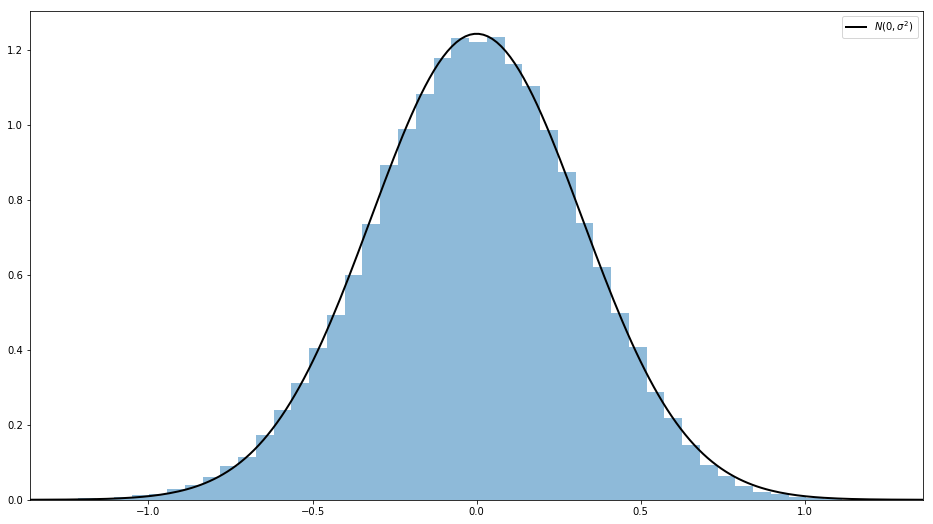

In [5]:
# Code for question 1

N = 250
sample_length = 100000

dist = stats.uniform(loc = 0.0, scale=(np.pi/2))
mu, sigma = dist.mean(), dist.std()

sample = dist.rvs((sample_length, N))
sample_means = sample.mean(axis = 1)  # Compute mean of each row
Y = np.sqrt(N) * (np.sin(sample_means) - np.sin(mu))

fig, ax = plt.subplots(figsize = (16, 9))
xmin, xmax = -3 * sigma, 3 * sigma
ax.set_xlim(xmin, xmax)
ax.hist(Y, bins = 50, alpha = 0.5, density = True)
xgrid = np.linspace(xmin, xmax, 200)
ax.plot(xgrid, stats.norm.pdf(xgrid, scale = sigma * np.cos(mu)), 'k-', linewidth = 2.0, label = '$N(0, \sigma^2)$')
ax.legend()

plt.show()

Instead, replace interval $[0, \pi/2]$ with $[0, \pi]$ we have the following histogram,

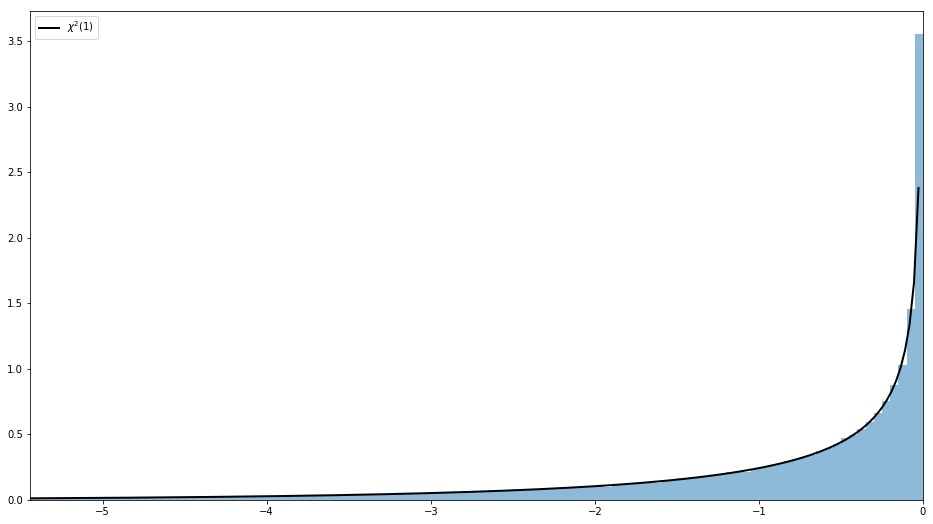

In [3]:
N = 2500
sample_length = 100000

dist = stats.uniform(loc = 0.0, scale=(np.pi))
mu, sigma = dist.mean(), dist.std()

sample = dist.rvs((sample_length, N))
sample_means = sample.mean(axis = 1)  # Compute mean of each row
Y = 2 / (sigma ** 2) / np.sin(mu) * N * (np.sin(sample_means) - np.sin(mu))

fig, ax = plt.subplots(figsize = (16, 9))
xmin, xmax = -6 * sigma, 0
ax.set_xlim(xmin, xmax)
ax.hist(Y, bins = 400, alpha = 0.5, density = True)
xgrid = np.linspace(xmin, xmax, 200)
ax.plot(xgrid, stats.chi2.pdf(-xgrid, df = 1), 'k-', linewidth = 2.0, label = '$\chi^{2}(1)$')
ax.legend()

plt.show()

And it's not a normal distribution any more! The reason is that the mean of the uniform distribution is $\pi / 2$ and $g'(\mu)=\cos(\mu)=0$ which violates the assumption of first order Delta method.

As second order Delta method says when $g'(\mu)=0$, 

$$
n \{ g(\bar X_n) - g(\mu) \}
\stackrel { d } {\to} -\frac{1}{2}\sigma^2 g''(\mu)\chi^2_1
\quad \text{as} \quad
n \to \infty
$$

### Exercise 2

Consider the following scenario. Time is discrete $t=1,2,3,...$. There are $N$ people in this world, each with initial wealth $0$ at $t=0$. In every period, we draw two numbers $1\leqslant i,j\leqslant N$. Each number shares the same probability to get drawn. Then, person $i$ will pay person $j$ with an amount of $p$.

For example, if there are 5 people and in period 1 the numbers we draw are $i=2, j=4$, then after the first period the wealth of all 5 people will be $\left[0, -p, 0, p, 0\right]$. Further, assume that in period 2 the numbers we draw are $i = 1, j = 4$, then after the second period we end up with a wealth distribution of $\left[-p, -p, 0, 2p, 0\right]$.

What kind of population wealth distribution you would expect When $N$ is large and $t$ is large? Simulate by yourself and try to identify what the wealth distribution is like. You can use Q-Q plot to show whether the distribution follows normal distribution or not. You may want to choose a small, positive $p$ when simulating.

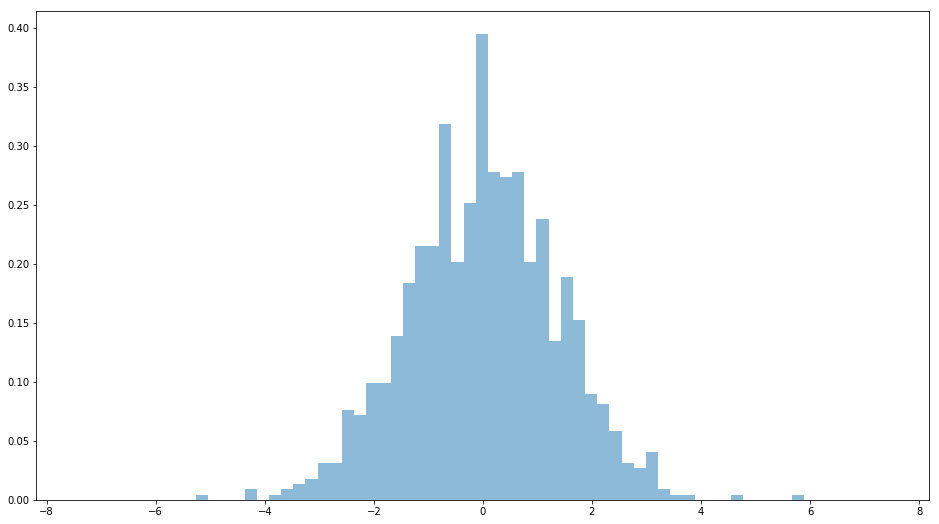

In [3]:
N = 1000
T = 10000000
p = 0.01

wealth = np.zeros(N)
st = stats.randint.rvs(1, N, size = T)
ed = stats.randint.rvs(1, N, size = T)
wealth += p * np.bincount(st)
wealth -= p * np.bincount(ed)

mu, sigma = np.mean(wealth), np.std(wealth)

fig, ax = plt.subplots(figsize = (16, 9))
xmin, xmax = mu - 6 * sigma, mu + 6 * sigma
ax.set_xlim(xmin, xmax)
ax.hist(wealth, bins = 50, alpha = 0.5, density = True)
plt.show()

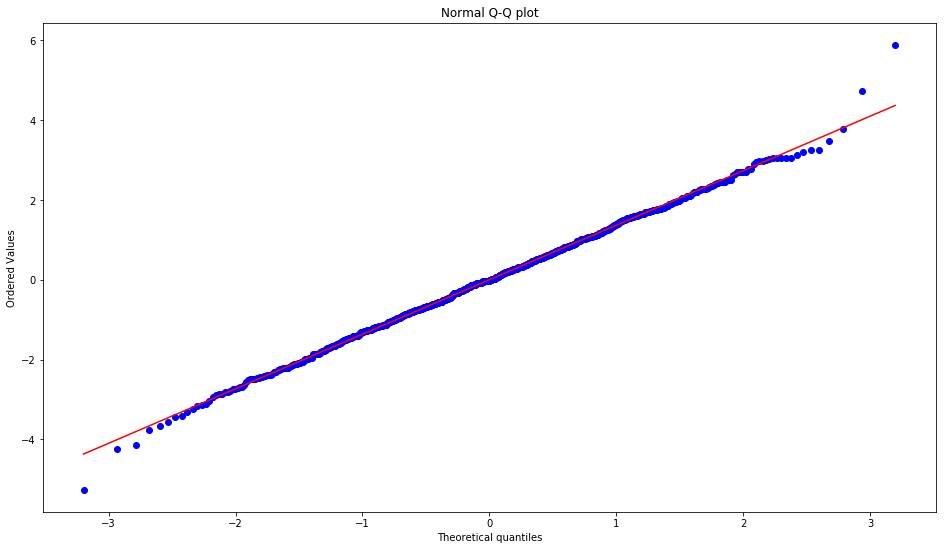

In [4]:
# Quantile-Quantile plot
plt.figure(figsize = (16, 9))
stats.probplot(wealth, dist = "norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()